<a href="https://colab.research.google.com/github/jeriko13/skripsi/blob/main/SVR_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [64]:
from google.colab import drive #Import Data dari google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
#Load the data
#from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
#Import Library yang dibutuhkan
import pandas as pd #import Library
import numpy as np #Matrix multiplication,
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

df = pd.read_csv('/content/drive/MyDrive/skripsi/dataset/ds-curah-hujan.csv' ,header=0, sep=';', names=['date', 'dewpoint', 'temperature', 'rainfall']) #membaca DataSet
#df.columns = ['tanggal', 'dewpoint', 'temperature', 'precipitation']
df.info()
df.head()

#print(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1286 non-null   object
 1   dewpoint     1286 non-null   object
 2   temperature  1286 non-null   object
 3   rainfall     1286 non-null   object
dtypes: object(4)
memory usage: 40.3+ KB


,date,dewpoint,temperature,rainfall
0,2017-01-01,"297,691","303,931","0,01"
1,2017-01-02,"297,72","303,498","0,012"
2,2017-01-03,"297,736","302,315","0,02"
3,2017-01-04,"297,772","302,133","0,016"
4,2017-01-05,"297,78","302,281","0,014"


In [30]:
#menghapus data yang kosong
df = df.dropna()


In [66]:
#Mengubah data Object ke Numerik
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['date']=le.fit_transform(df['date'])
df['dewpoint']=le.fit_transform(df['dewpoint'])
df['temperature']=le.fit_transform(df['temperature'])
df['rainfall']=le.fit_transform(df['rainfall'])

In [67]:
#cek data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   date         1286 non-null   int64
 1   dewpoint     1286 non-null   int64
 2   temperature  1286 non-null   int64
 3   rainfall     1286 non-null   int64
dtypes: int64(4)
memory usage: 40.3 KB


In [69]:
#Membagi data, Data Test dan Data Training
from sklearn.model_selection import train_test_split
#membagi semua baris, semua kolom
x=df.iloc[:,:-1].values
#membagi semua baris, kolom terakhir
y=df.iloc[:,-1].values
print(x.shape)

(1286, 3)


In [70]:
#data yang telah dibagi disimpan dalam variable
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.9,random_state=42)

In [59]:
#menggunakan kernel linear untuk prediksi data training
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(xtrain,ytrain)

SVR(kernel='linear')

In [71]:
#Memanggil hasil prediksi data test
hasil=svr.predict(xtest)

In [74]:
#Perhitungan Prediksi menggunakan SVR
from sklearn.metrics import r2_score

coef=r2_score(ytest,hasil)
coef

0.27596790645412717

In [75]:
#melakukan import data untuk menghitung manual apakah sesuai dengan perhitungan Mesin
import csv

xt=pd.DataFrame(xtest)
yt=pd.DataFrame(ytest)
yp=pd.DataFrame(hasil)

xt.to_csv("x.csv")
yt.to_csv("y.csv")
yt.to_csv("prediksi.csv")

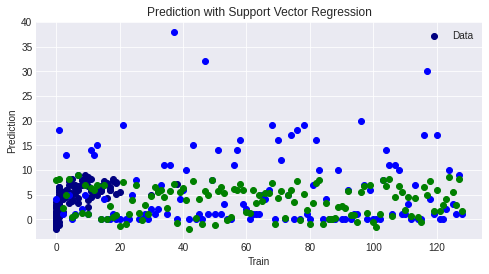

In [79]:
#Menampilkan Grafik
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.scatter(ytest, hasil, color='navy', label='Data')
plt.scatter(range(len(xtest)),ytest,color='blue')
plt.scatter(range(len(xtest)),hasil,color='green')
plt.xlabel('Train')
plt.ylabel('Prediction')
plt.title('Prediction with Support Vector Regression')
plt.legend()
plt.show()